# **Peach Classifier (Fresh or Rotten)**

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Data Preprocessing

In [2]:
fresh_path = "peaches/fresh_peaches"
rotten_path = "peaches/rotten_peaches"

data = []
labels = []

# fresh
for filename in os.listdir(fresh_path):
    img_path = os.path.join(fresh_path, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(img_path)
        
        if img is not None:
            img = cv2.resize(img, (300, 300))
            data.append(img)
            labels.append("fresh")
            

# rotten
for filename in os.listdir(rotten_path):
    img_path = os.path.join(rotten_path, filename)

    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img = cv2.imread(img_path)
        
        if img is not None:
            img = cv2.resize(img, (300, 300))
            data.append(img)
            labels.append("rotten")
            

data = np.array(data)
labels = np.array(labels)


## Splitting Dataset

In [3]:
# fresh = 0, rotten = 1
le = LabelEncoder()
labels = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


## Building CNN

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Training the Model

In [5]:
training = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10


4/4 [==============================] - 17s 4s/step - loss: 4665.5474 - accuracy: 0.5338 - val_loss: 1232.9142 - val_accuracy: 0.4706
Epoch 2/10
4/4 [==============================] - 16s 4s/step - loss: 636.1367 - accuracy: 0.5063 - val_loss: 294.5109 - val_accuracy: 0.5378
Epoch 3/10
4/4 [==============================] - 16s 4s/step - loss: 89.8067 - accuracy: 0.6983 - val_loss: 5.4774 - val_accuracy: 0.7311
Epoch 4/10
4/4 [==============================] - 16s 4s/step - loss: 14.7861 - accuracy: 0.7342 - val_loss: 5.9204 - val_accuracy: 0.8235
Epoch 5/10
4/4 [==============================] - 15s 4s/step - loss: 11.3299 - accuracy: 0.7848 - val_loss: 8.9397 - val_accuracy: 0.7059
Epoch 6/10
4/4 [==============================] - 16s 4s/step - loss: 7.0542 - accuracy: 0.8228 - val_loss: 2.8534 - val_accuracy: 0.8487
Epoch 7/10
4/4 [==============================] - 15s 4s/step - loss: 2.3208 - accuracy: 0.8966 - val_loss: 4.0204 - val_accuracy: 0.7983
Epoch 8/10
4/4 [===

## Training Visualization 

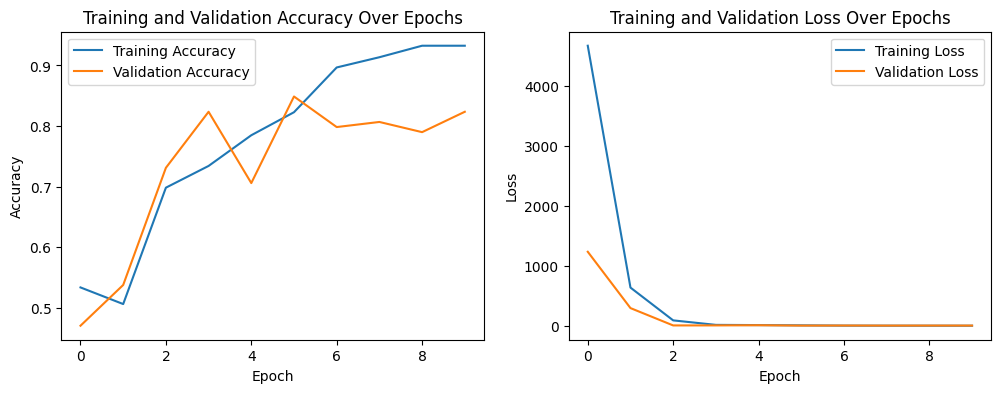

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training.history['accuracy'], label='Training Accuracy')
plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')

plt.show()

## Results

In [7]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}")
print(f"Train Accuracy: {accuracy*100:.2f}%")

4/4 [==============================] - 1s 163ms/step - loss: 3.1373 - accuracy: 0.8235
Test Loss: 3.1373
Test Accuracy: 82.35%
15/15 [==============================] - 3s 170ms/step - loss: 0.6563 - accuracy: 0.9283
Train Loss: 0.6563
Train Accuracy: 92.83%


In [11]:
image_path = "peaches/rotten_peaches/rotten_peach_11.jpg"
img = cv2.imread(image_path)
img = cv2.resize(img, (300, 300))
img = np.expand_dims(img, axis=0)  # Add batch dimension

prediction = model.predict(img)
if prediction > 0.5:
    print("Rotten Peach")
else:
    print("Fresh Peach")


1/1 [==============================] - 0s 45ms/step
Rotten Peach


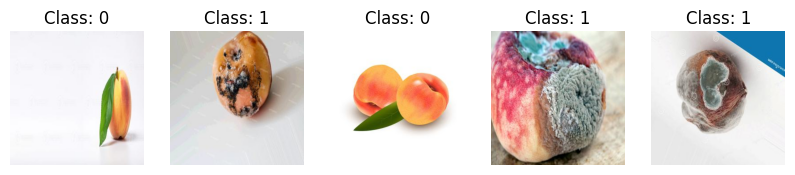

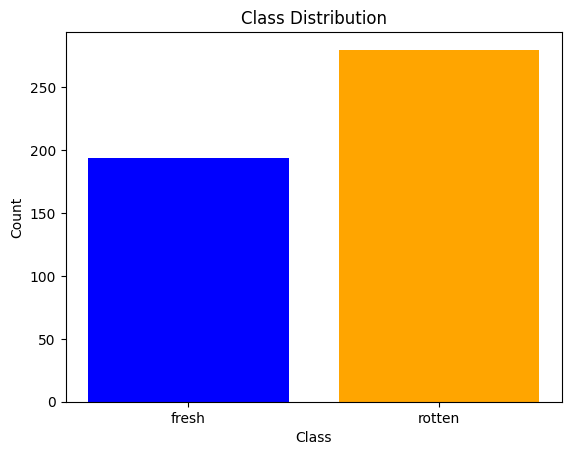

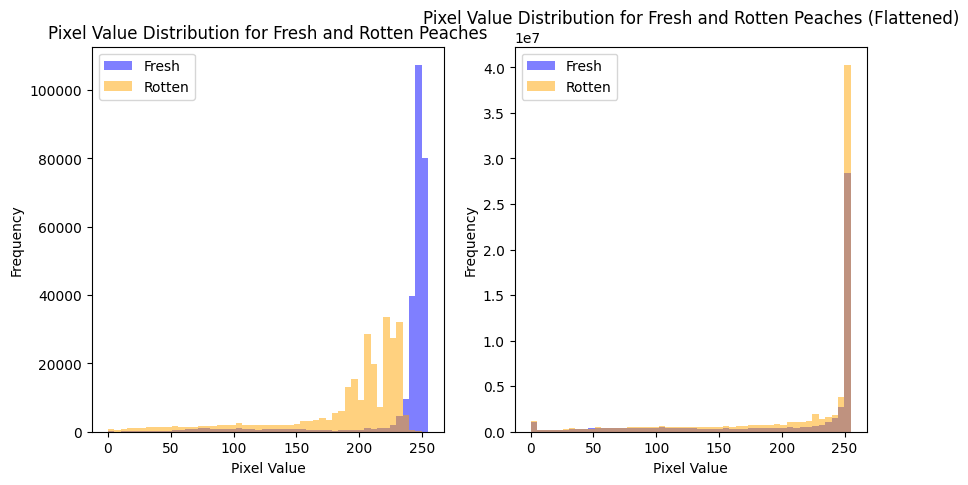

In [9]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    img_rgb = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Class: {y_train[i]}")
    plt.axis('off')

# Bar chart for class distribution
plt.figure()
plt.bar(le.classes_, np.bincount(y_train), color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Histograms for image dimensions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X_train[y_train == 0].reshape(-1, 300 * 300 * 3)[0], bins=50, color='blue', alpha=0.5, label='Fresh')
plt.hist(X_train[y_train == 1].reshape(-1, 300 * 300 * 3)[0], bins=50, color='orange', alpha=0.5, label='Rotten')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution for Fresh and Rotten Peaches')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(X_train[y_train == 0].flatten(), bins=50, color='blue', alpha=0.5, label='Fresh')
plt.hist(X_train[y_train == 1].flatten(), bins=50, color='orange', alpha=0.5, label='Rotten')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution for Fresh and Rotten Peaches (Flattened)')
plt.legend()

plt.show()

15/15 [==============================] - 3s 180ms/step


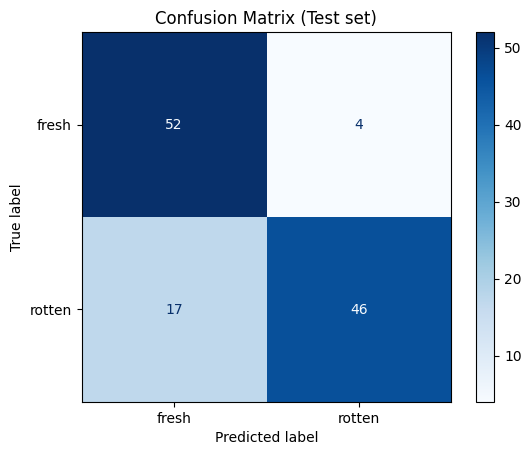

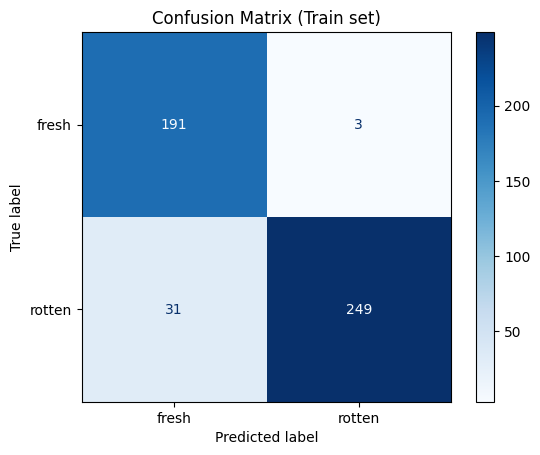

In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

y_pred_full = model.predict(X_train)
y_pred_classes_full = np.round(y_pred_full)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Test set)')
plt.show()

cm = confusion_matrix(y_train, y_pred_classes_full)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (Train set)')
plt.show()